In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import scipy.stats as stats

In [15]:
#Read data from the CSV file named 'population.csv' and store it in a DataFrame named 'population'
population=pd.read_csv('population.csv')
population

,Country Name,Population (Jan 2024),Population(2023),Area(km),Land Area (Km),Density(/Km),Growth Rate,World%,Rank
0,India,"1,43,63,97,893","1,42,86,27,663",3.3M,3M,485,0.92%,18.01%,1
1,China,"1,42,54,36,213","1,42,56,71,352",9.7M,9.4M,151,-0.03%,17.80%,2
2,United States,"34,10,75,762","33,99,96,563",9.4M,9.1M,37,0.53%,4.27%,3
3,Indonesia,"27,88,83,459","27,75,34,122",1.9M,1.9M,149,0.82%,3.50%,4
4,Pakistan,"24,32,70,676","24,04,85,658",881.9K,770.9K,318,1.96%,3.06%,5
...,...,...,...,...,...,...,...,...,...
229,Montserrat,NaN,"4,386",102,102,43,-0.32%,NaN,230
230,Falkland Islands,NaN,"3,791",12.2K,12.2K,0.31,0.32%,NaN,231
231,Niue,"1,935","1,935",261,261,7,NaN,NaN,232
232,Tokelau,NaN,"1,893",12,10,192,1.16%,NaN,233


In [16]:
#Display the population DataFrame
population
# Check for null values in the population DataFrame and sum them.
population.isnull().sum()

Country Name              0
Population (Jan 2024)    10
Population(2023)          0
Area(km)                  0
Land Area (Km)            0
Density(/Km)              0
Growth Rate               2
World%                   57
Rank                      0
dtype: int64

In [17]:
#Remove rows with null values from the 'population' DataFrame
pop = population.dropna()
# Check for null values in each column of the 'pop' DataFrame and sum them up
pop.isnull().sum()

Country Name             0
Population (Jan 2024)    0
Population(2023)         0
Area(km)                 0
Land Area (Km)           0
Density(/Km)             0
Growth Rate              0
World%                   0
Rank                     0
dtype: int64

In [18]:
#Display the shape of the DataFrame 'pop'
pop.shape

(175, 9)

In [19]:
#Check for duplicated rows in the DataFrame 'pop' and count each unique value
pop.duplicated().value_counts()

False    175
Name: count, dtype: int64

In [20]:
#Generate descriptive statistics for the DataFrame 'pop'
pop.describe()

,Rank
count,175.000000
mean,88.354286
std,51.169654
min,1.000000
25%,44.500000
50%,88.000000
75%,131.500000
max,177.000000


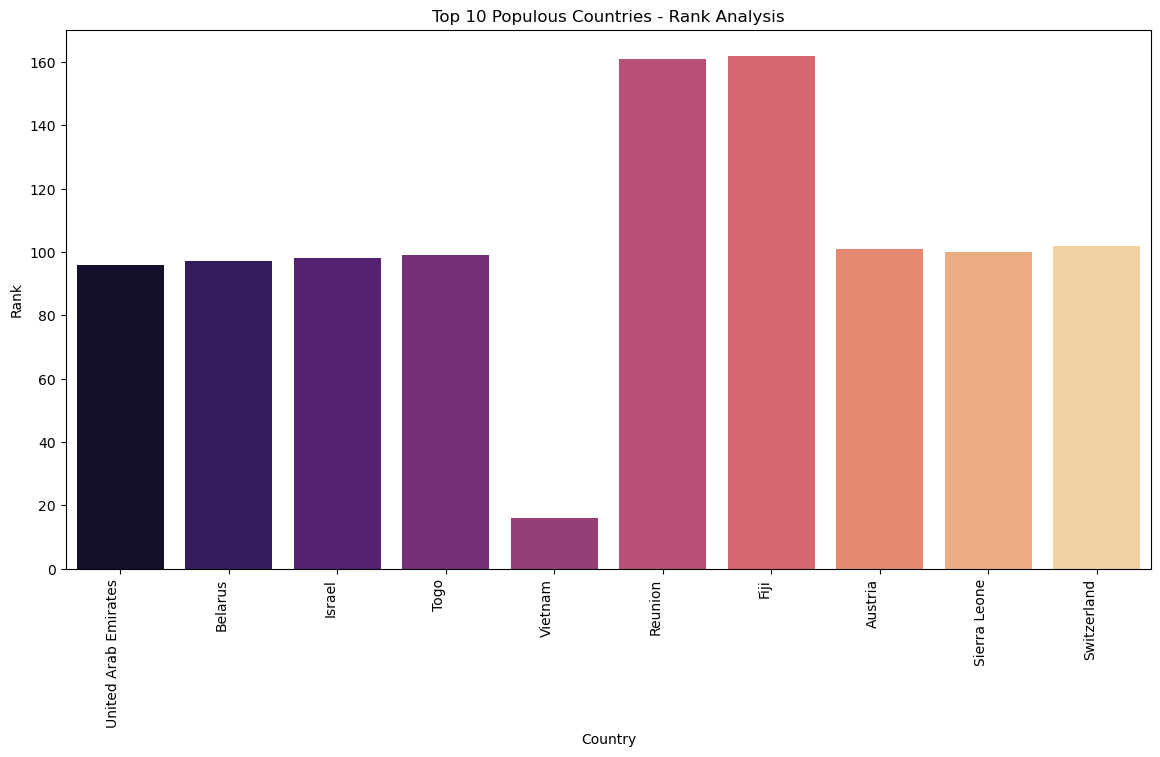

In [21]:
#Set the figure size for the plot
plt.figure(figsize=(14, 7))
# Create a bar plot of the top 10 populous countries based on their ranks
sns.barplot(x='Country Name', y='Rank', data=pop.sort_values(by='Population (Jan 2024)', ascending=False).head(10), palette='magma')
#Set the title of the plot
plt.title('Top 10 Populous Countries - Rank Analysis')
plt.xlabel('Country')
plt.ylabel('Rank')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right')
# Display the plot
plt.show()





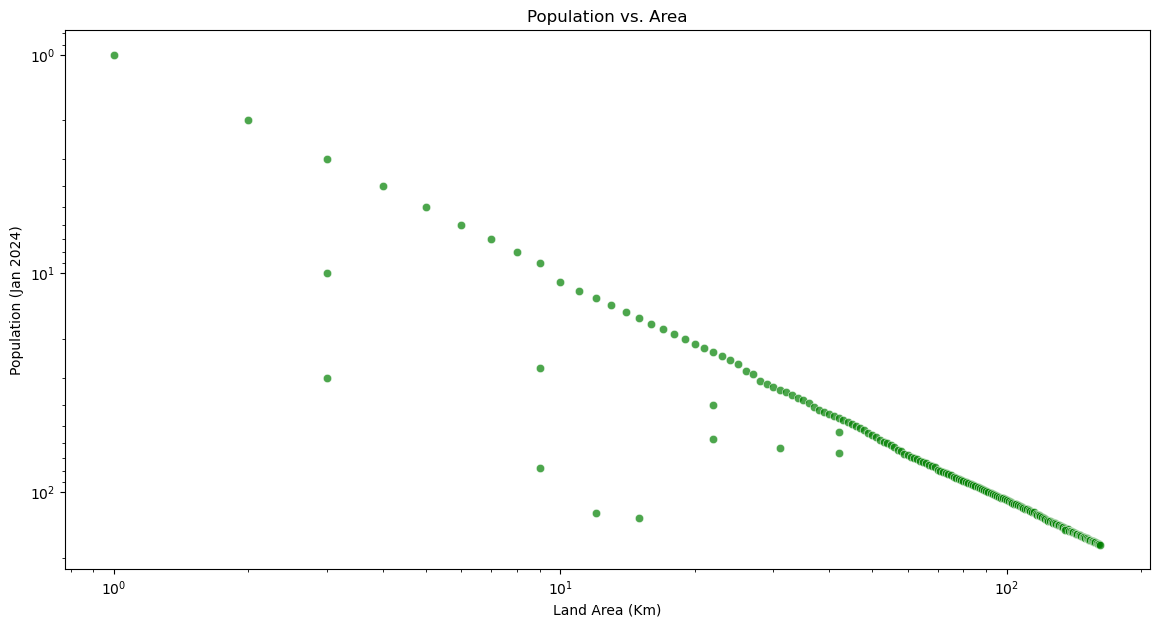

In [22]:
#Set the figure size for the plot
plt.figure(figsize=(14, 7))
#Create a scatter plot to visualize the relationship between land area and population
sns.scatterplot(x='Land Area (Km)', y='Population (Jan 2024)', data=pop, color='green', alpha=0.7)
plt.title('Population vs. Area')
plt.xlabel('Land Area (Km)')
plt.ylabel('Population (Jan 2024)')
plt.xscale('log')
plt.yscale('log')
# Display the plot
plt.show()




In [23]:
# Convert the data in 'pop' DataFrame to numeric type, coercing errors to NaN
population_numeric = pop.apply(pd.to_numeric, errors='coerce')
# Calculate the correlation matrix for selected numeric columns
Correlation = population_numeric[['Area(km)','Land Area (Km)','Rank']].corr()
Correlation

,Area(km),Land Area (Km),Rank
Area(km),1.000000,0.999902,-0.685072
Land Area (Km),0.999902,1.000000,-0.679878
Rank,-0.685072,-0.679878,1.000000


In [24]:
#Selecting columns 'Area(km)', 'Land Area (Km)', and 'Rank' from the DataFrame 'pop'
correlation = pop[['Area(km)','Land Area (Km)','Rank']]
correlation

,Area(km),Land Area (Km),Rank
0,3.3M,3M,1
1,9.7M,9.4M,2
2,9.4M,9.1M,3
3,1.9M,1.9M,4
4,881.9K,770.9K,5
...,...,...,...
172,316,320,173
173,300,300,174
174,5.8K,5.3K,175
175,23K,22.8K,176


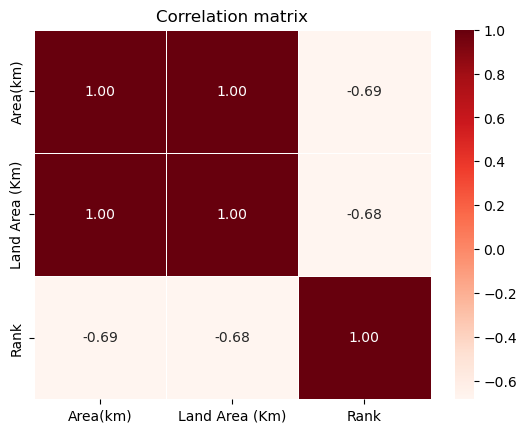

In [25]:
#Create a heatmap to visualize the correlation matrix
plt.figure()
#Generate a heatmap with correlation values annotated, using the 'Reds' colormap
sns.heatmap(Correlation, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)
#Set the title of the plot
plt.title('Correlation matrix')
plt.show()

In [26]:
#Calculate the skewness of the 'Rank' column in the 'population_numeric' DataFrame
skewval = skew(population_numeric['Rank'])
# Print the skewness value
print('Skewness of the Rank =', skewval)
#Calculate the kurtosis of the 'Rank' column in the 'population_numeric' DataFrame
kurtosis_val = kurtosis(population_numeric['Rank'])
#Print the kurtosis value
print('Kurtosis value of the Rank =', kurtosis_val)

Skewness of the Rank = 0.02215469899940954
Kurtosis value of the Rank = -1.1869669128784097
